[View in Colaboratory](https://colab.research.google.com/github/zhangjunli177/kdd2009-nokia/blob/master/KDD2009.ipynb)

# 1. KDD2009 data preprocessing
If the following sections, we do the following things:<br>


1.   download the data from KDD
2.   use 32bit to store int/float into memory
3.   remove the columns with Nan more than 20%



In [1]:
!pwd

/content


In [0]:
!mkdir -p KDD2009/DATA

In [3]:
cd KDD2009/DATA

/content/KDD2009/DATA


In [4]:
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk1.zip
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk2.zip
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk3.zip
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk4.zip
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk5.zip
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train_appetency.labels
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train_churn.labels
!wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train_upselling.labels

--2018-10-21 02:30:08--  http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk1.zip
Resolving www.kdd.org (www.kdd.org)... 72.10.51.228
Connecting to www.kdd.org (www.kdd.org)|72.10.51.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55314613 (53M) [application/zip]
Saving to: ‘orange_large_train.data.chunk1.zip’

orange_large_train. 100%[===================>]  52.75M  19.9MB/s    in 2.6s    

2018-10-21 02:30:11 (19.9 MB/s) - ‘orange_large_train.data.chunk1.zip’ saved [55314613/55314613]

--2018-10-21 02:30:13--  http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk2.zip
Resolving www.kdd.org (www.kdd.org)... 72.10.51.228
Connecting to www.kdd.org (www.kdd.org)|72.10.51.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55358638 (53M) [application/zip]
Saving to: ‘orange_large_train.data.chunk2.zip’

orange_large_train. 100%[===================>]  52.79M  18.2MB/s    in 2.9s    

2018-10-21 0

In [5]:
!unzip orange_large_train.data.chunk1.zip
!unzip orange_large_train.data.chunk2.zip
!unzip orange_large_train.data.chunk3.zip
!unzip orange_large_train.data.chunk4.zip
!unzip orange_large_train.data.chunk5.zip

Archive:  orange_large_train.data.chunk1.zip
  inflating: orange_large_train.data.chunk1  
Archive:  orange_large_train.data.chunk2.zip
  inflating: orange_large_train.data.chunk2  
Archive:  orange_large_train.data.chunk3.zip
  inflating: orange_large_train.data.chunk3  
Archive:  orange_large_train.data.chunk4.zip
  inflating: orange_large_train.data.chunk4  
Archive:  orange_large_train.data.chunk5.zip
  inflating: orange_large_train.data.chunk5  


In [6]:
ls

orange_large_train_appetency.labels  orange_large_train.data.chunk3.zip
orange_large_train_churn.labels      orange_large_train.data.chunk4
orange_large_train.data.chunk1       orange_large_train.data.chunk4.zip
orange_large_train.data.chunk1.zip   orange_large_train.data.chunk5
orange_large_train.data.chunk2       orange_large_train.data.chunk5.zip
orange_large_train.data.chunk2.zip   orange_large_train_upselling.labels
orange_large_train.data.chunk3


In [7]:
cd /content/KDD2009/

/content/KDD2009


In [0]:
# enable In-Line MatPlotLib
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
from __future__ import division, print_function
from matplotlib.pyplot import figure, legend, hist, plot, title
from multiprocessing import cpu_count
from numpy import allclose, exp, float, int, linspace, log, nan, sqrt
from os import system
from os.path import join as pjoin
from pandas import Categorical, concat, DataFrame, get_dummies, read_table, Series, read_csv
from random import seed
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

RANDOM_SEED = 99
seed(RANDOM_SEED)

In [0]:
data_folder_path = 'DATA'
filepaths = {
    'churn_labels': pjoin(data_folder_path, 'orange_large_train_churn.labels'),
    'appetency_labels': pjoin(data_folder_path, 'orange_large_train_appetency.labels'),
    'upselling_labels': pjoin(data_folder_path, 'orange_large_train_upselling.labels'),
    'train_data_chunk1': pjoin(data_folder_path, 'orange_large_train.data.chunk1'),
    'train_data_chunk2': pjoin(data_folder_path, 'orange_large_train.data.chunk2'),
    'train_data_chunk3': pjoin(data_folder_path, 'orange_large_train.data.chunk3'),
    'train_data_chunk4': pjoin(data_folder_path, 'orange_large_train.data.chunk4'),
    'train_data_chunk5': pjoin(data_folder_path, 'orange_large_train.data.chunk5'),
    'train_data': pjoin(data_folder_path, 'orange_large_train.data'),    
}

In [11]:
churn = read_table(
    filepaths['churn_labels'],
    header=None).iloc[:, 0].astype('category')

churn.cat.rename_categories(['no', 'yes'], inplace=True)

appetency = read_table(
    filepaths['appetency_labels'],
    header=None).iloc[:, 0].astype('category')

appetency.cat.rename_categories(['no', 'yes'], inplace=True)

upselling = read_table(
    filepaths['upselling_labels'],
    header=None).iloc[:, 0].astype('category')

upselling.cat.rename_categories(['no', 'yes'], inplace=True)

print (churn.size, appetency.size, upselling.size)

50000 50000 50000


In [12]:
%%time
na_strings = [
  '',
  'na', 'n.a', 'n.a.',
  'nan', 'n.a.n', 'n.a.n.',
  'NA', 'N.A', 'N.A.',
  'NaN', 'N.a.N', 'N.a.N.',
  'NAN', 'N.A.N', 'N.A.N.',
  'nil', 'Nil', 'NIL',
  'null', 'Null', 'NULL']

X1 = read_table(
    filepaths['train_data_chunk1'],
    na_values=na_strings, low_memory=False)

CPU times: user 24.6 s, sys: 2.76 s, total: 27.3 s
Wall time: 27.4 s


In [13]:
X1.shape

(9999, 15000)

In [14]:
print('memory usage: {:.2f} MB'.format(X1.memory_usage().sum() / 2**20))

memory usage: 1144.29 MB


In [0]:
dtypes_32 = X1.dtypes

In [0]:
dtypes_32 = dtypes_32.replace('int64', 'float32')
dtypes_32 = dtypes_32.replace('float64', 'float32')

In [0]:
dtypes_32 = dtypes_32.to_dict()

In [0]:
col_names = X1.dtypes.index.format()

In [19]:
%%time
X2 = read_table(
    filepaths['train_data_chunk2'],
    dtype = dtypes_32,
    header=None,
    names=col_names,
    na_values=na_strings, low_memory=False)

CPU times: user 25.4 s, sys: 1.76 s, total: 27.1 s
Wall time: 27.2 s


In [20]:
print('memory usage: {:.2f} MB'.format(X2.memory_usage().sum() / 2**20))

memory usage: 579.41 MB


In [0]:
X3 = read_table(
    filepaths['train_data_chunk3'],
    dtype = dtypes_32,
    header=None,
    names=col_names,
    na_values=na_strings, low_memory=False)

X4 = read_table(
    filepaths['train_data_chunk4'],
    dtype = dtypes_32,
    header=None,
    names=col_names,
    na_values=na_strings, low_memory=False)

X5 = read_table(
    filepaths['train_data_chunk5'],
    dtype = dtypes_32,
    header=None,
    names=col_names,
    na_values=na_strings, low_memory=False)

In [0]:
del X1
X1 = read_table(
    filepaths['train_data_chunk1'],
    dtype = dtypes_32,
#    header=None,
#    names=col_names,
    na_values=na_strings, low_memory=False)

In [23]:
X = concat([X1, X2, X3, X4, X5], ignore_index=True)
print (X.shape)

(50000, 15000)


In [0]:
del X1, X2, X3, X4, X5

In [25]:
import gc
gc.collect()

28

In [26]:
print('memory usage: {:.2f} MB'.format(X.memory_usage().sum() / 2**20))

memory usage: 2897.07 MB


In [27]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var14991,Var14992,Var14993,Var14994,Var14995,Var14996,Var14997,Var14998,Var14999,Var15000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,IPyde4c,NaN,KttQ,NBRvrWWx0Z,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,tQAVcMq,NaN,KttQ,NBRvrWWx0Z,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,mnKkkvG,NaN,KttQ,NBRvrWWx0Z,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,ZF0bafC,NaN,KttQ,NBRvrWWx0Z,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,z1miBkG,NaN,Q8_a,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,u'Proportion of Missing Values in Input Features')

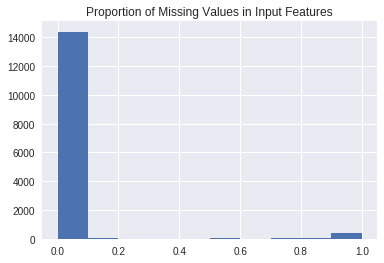

In [28]:
nb_train_samples = len(X)

input_features_missing_proportions = X.isnull().sum() / nb_train_samples

hist(input_features_missing_proportions)
title('Proportion of Missing Values in Input Features')

In [29]:
# discard all columns with missing values more than 20%
x_var_names = input_features_missing_proportions[input_features_missing_proportions <= .2].index
X = X[x_var_names]
X.shape

(50000, 14462)

In [30]:
import gc
gc.collect()

135079

In [0]:
zero_cols = []
for var_name in x_var_names:
    if np.all(X[var_name]==0):
        zero_cols.append(var_name)

In [0]:
non_zero_cols = set(x_var_names) - set(zero_cols)

In [0]:
non_zero_cols = np.array(list(non_zero_cols))

In [0]:
X = X[non_zero_cols]

In [35]:
X.shape

(50000, 13042)

In [0]:
zero_percent_cols = 1 - X.astype(bool).sum(axis=0)/nb_train_samples

Text(0.5,1,u'Proportion of zero percentage in Input Features')

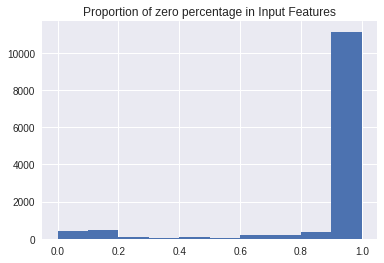

In [37]:
hist(zero_percent_cols)
title('Proportion of zero percentage in Input Features')

In [38]:
gc.collect()

130179

In [0]:
rmv_most_zoro_cols = zero_percent_cols[zero_percent_cols <= 0.9]

In [40]:
len(rmv_most_zoro_cols)

1908

In [0]:
X = X[rmv_most_zoro_cols.index]

In [42]:
X.shape

(50000, 1908)

In [43]:
print('memory usage: {:.2f} MB'.format(X.memory_usage().sum() / 2**20))

memory usage: 369.83 MB


In [44]:
X.dtypes

Var10974    float32
Var2418     float32
Var11370    float32
Var2434     float32
Var8342     float32
Var10392    float32
Var10393    float32
Var6246     float32
Var10026    float32
Var2639     float32
Var14703    float32
Var9626     float32
Var9622     float32
Var2411     float32
Var970      float32
Var2413     float32
Var3944     float32
Var975      float32
Var4665     float32
Var4666     float32
Var4667     float32
Var4668     float32
Var4669     float32
Var11619    float32
Var3942     float32
Var2975     float32
Var2979     float32
Var8542     float32
Var14221    float32
Var5722     float32
             ...   
Var10764    float32
Var10767    float32
Var10766    float32
Var10769    float32
Var10768    float32
Var9386     float32
Var9381     float32
Var6383     float32
Var6382     float32
Var6386     float32
Var396      float32
Var7651     float32
Var2765     float32
Var9834     float32
Var4498     float32
Var7386     float32
Var7382     float32
Var14465    float32
Var13442    float32


In [0]:
X.to_csv(filepaths['train_data'], sep='\t', index=0)

In [46]:
X['Var14993'].head()

0    IPyde4c
1    tQAVcMq
2    mnKkkvG
3    ZF0bafC
4    z1miBkG
Name: Var14993, dtype: object

In [47]:
!grep "Var15" orange_large_train.data

grep: orange_large_train.data: No such file or directory


In [48]:
gc.collect()

12

In [0]:
x_var_names = rmv_most_zoro_cols.index

In [50]:
x_types = {x_var_name: X[x_var_name].dtype for x_var_name in x_var_names}

for x_var_name in x_var_names:
    if x_types[x_var_name] != np.float32:
        x = X[x_var_name].astype('category')
        X.loc[:, x_var_name] = x
        x_types[x_var_name] = x.dtype

x_types

{'Var12496': dtype('float32'),
 'Var2708': dtype('float32'),
 'Var5031': dtype('float32'),
 'Var10377': dtype('float32'),
 'Var5035': dtype('float32'),
 'Var2701': dtype('float32'),
 'Var10803': dtype('float32'),
 'Var10574': dtype('float32'),
 'Var11578': dtype('float32'),
 'Var12716': dtype('float32'),
 'Var12714': dtype('float32'),
 'Var8003': dtype('float32'),
 'Var4205': dtype('float32'),
 'Var11281': dtype('float32'),
 'Var2639': dtype('float32'),
 'Var9628': dtype('float32'),
 'Var10974': dtype('float32'),
 'Var9626': dtype('float32'),
 'Var2637': dtype('float32'),
 'Var9622': dtype('float32'),
 'Var9621': dtype('float32'),
 'Var4327': dtype('float32'),
 'Var9444': dtype('float32'),
 'Var2411': dtype('float32'),
 'Var2413': dtype('float32'),
 'Var3944': dtype('float32'),
 'Var3940': dtype('float32'),
 'Var2418': dtype('float32'),
 'Var3942': dtype('float32'),
 'Var2382': dtype('float32'),
 'Var5727': dtype('float32'),
 'Var5722': dtype('float32'),
 'Var11370': dtype('float32'),


In [51]:
len(x_types)

1908

In [52]:
float_x_var_names = [x_var_name for x_var_name in x_var_names
                     if x_types[x_var_name] == np.float32]

len(float_x_var_names)

1877

In [53]:
# calculate the missing value rate in each column
X[float_x_var_names].isnull().sum() / nb_train_samples

Var10974    0.0
Var2418     0.0
Var11370    0.0
Var2434     0.0
Var8342     0.0
Var10392    0.0
Var10393    0.0
Var6246     0.0
Var10026    0.0
Var2639     0.0
Var14703    0.0
Var9626     0.0
Var9622     0.0
Var2411     0.0
Var970      0.0
Var2413     0.0
Var3944     0.0
Var975      0.0
Var4665     0.0
Var4666     0.0
Var4667     0.0
Var4668     0.0
Var4669     0.0
Var11619    0.0
Var3942     0.0
Var2975     0.0
Var2979     0.0
Var8542     0.0
Var14221    0.0
Var5722     0.0
           ... 
Var10764    0.0
Var10767    0.0
Var10766    0.0
Var10769    0.0
Var10768    0.0
Var9386     0.0
Var9381     0.0
Var6383     0.0
Var6382     0.0
Var6386     0.0
Var396      0.0
Var7651     0.0
Var2765     0.0
Var9834     0.0
Var4498     0.0
Var7386     0.0
Var7382     0.0
Var14465    0.0
Var13442    0.0
Var13444    0.0
Var13506    0.0
Var9128     0.0
Var1734     0.0
Var3386     0.0
Var8171     0.0
Var12539    0.0
Var13731    0.0
Var9066     0.0
Var8717     0.0
Var11720    0.0
Length: 1877, dtype: flo

In [54]:
# fill the missing value with mean
float_x_means = X.mean()

for float_x_var_name in float_x_var_names:
    x = X[float_x_var_name]
    missing_value_row_yesno = x.isnull()
    if missing_value_row_yesno.sum() > 0:
        print (float_x_var_name)
        X.loc[missing_value_row_yesno.tolist(), float_x_var_name] =\
            float_x_means[float_x_var_name]

Var3624
Var3972
Var4349
Var13899
Var5216
Var9799
Var6049
Var559
Var8461
Var5365
Var3080
Var1565
Var6636
Var1604
Var5316
Var2382
Var6653
Var7295
Var1501
Var8484
Var11879
Var7146
Var14415
Var7425
Var9687
Var990
Var12996
Var9395
Var647
Var4282
Var6255
Var8854
Var10557
Var6401
Var6072
Var10538
Var12027
Var5166
Var3480
Var3924
Var14187
Var9902
Var1808
Var9045
Var6418
Var5031
Var1845
Var3568
Var6642
Var8239
Var12628
Var4379
Var3390
Var169
Var9772
Var13166
Var12324
Var982
Var182
Var1176
Var4290
Var13581


In [55]:
# allclose(X.mean(), float_x_means)

True

In [56]:
categorical_x_var_names = [x_var_name for x_var_name in x_var_names
                           if x_types[x_var_name] != np.float32]

categorical_x_nb_levels = X[categorical_x_var_names].apply(lambda col: len(col.cat.categories))

categorical_x_nb_levels

Var14811        7
Var14875        1
Var14993     4291
Var14990       23
Var14996        4
Var14995        2
Var14765        3
Var14762        6
Var14786      100
Var14788      361
Var14921        4
Var14913     5713
Var14910       23
Var14800        5
Var14822    13990
Var14755       14
Var14778       30
Var14773       22
Var14989        2
Var14791       51
Var14795     2016
Var14797     4291
Var14965      225
Var14969       11
Var14923       81
Var14904     5073
Var14903        7
Var14970       21
Var14893     4291
Var14890        2
Var14869        1
dtype: int64

In [57]:
len(categorical_x_var_names)

31

In [58]:
# remove all the features with more than 500 categories
categorical_x_var_names = categorical_x_nb_levels[categorical_x_nb_levels <= 500].index

categorical_x_var_names

Index([u'Var14811', u'Var14875', u'Var14990', u'Var14996', u'Var14995',
       u'Var14765', u'Var14762', u'Var14786', u'Var14788', u'Var14921',
       u'Var14910', u'Var14800', u'Var14755', u'Var14778', u'Var14773',
       u'Var14989', u'Var14791', u'Var14965', u'Var14969', u'Var14923',
       u'Var14903', u'Var14970', u'Var14890', u'Var14869'],
      dtype='object')

In [0]:
# set category zzzMISSING for all the missing value
# If the count of one category less then 5% of total train number, merge all those into zzzOTHER category.
# if only one value in the category except zzzMISSING&zzzOTHER, just discard the feature.
collapsed_categories = {}
removed_categorical_x_var_names = set()

for categorical_x_var_name in categorical_x_var_names:
  
    missing_value_row_yesno = X[categorical_x_var_name].isnull()
    if missing_value_row_yesno.sum() > 0:
        X[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
        X.loc[missing_value_row_yesno.tolist(), categorical_x_var_name] = 'zzzMISSING'

    x = X[categorical_x_var_name].copy()
    for category in x.cat.categories:
        matching_rows_yesno = x == category
        if matching_rows_yesno.sum() < .05 * nb_train_samples:
            if categorical_x_var_name in collapsed_categories:
                collapsed_categories[categorical_x_var_name].append(category) 
            else:
                collapsed_categories[categorical_x_var_name] = [category]
            if 'zzzOTHER' not in X[categorical_x_var_name].cat.categories:
                X[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            X.loc[matching_rows_yesno, categorical_x_var_name] = 'zzzOTHER'
            X[categorical_x_var_name].cat.remove_categories(category, inplace=True)
  
    categories = X[categorical_x_var_name].cat.categories
    if (len(categories) == 1) or\
        (len(set(categories) - set(['zzzMISSING', 'zzzOTHER'])) < 2):
        removed_categorical_x_var_names.add(categorical_x_var_name)

categorical_x_var_names = list(set(categorical_x_var_names) - removed_categorical_x_var_names)

In [60]:
len(categorical_x_var_names)

16

In [61]:
# show the list of categories and persentage of each category.
for categorical_x_var_name in categorical_x_var_names:
    print(categorical_x_var_name)
    print("------------------")
    x = X[categorical_x_var_name]
    cat_list = Series({category: (x == category).sum() / nb_train_samples\
         for category in x.cat.categories})
    print(cat_list)

Var14755
------------------
2Jrzeror09KgszZCENk          0.13778
D9pJUioXj4                   0.70158
ONkBOBXZwA03uSrQezLYVSBHs    0.07006
zzzOTHER                     0.09058
dtype: float64
Var14903
------------------
_lnU        0.74018
fhGWgdI     0.06120
xfMf        0.12398
zzzOTHER    0.07464
dtype: float64
Var14890
------------------
5eCd    0.80598
zSxe    0.19402
dtype: float64
Var14800
------------------
9Eky        0.06336
nENa        0.90466
zzzOTHER    0.03198
dtype: float64
Var14923
------------------
887e             0.05984
ILESZvp          0.58606
SCQzH0gZvV5Y2    0.12866
zzzOTHER         0.22544
dtype: float64
Var14811
------------------
5wZZ        0.70312
izAR        0.12306
m9Te        0.06852
zzzOTHER    0.10530
dtype: float64
Var14970
------------------
6N01          0.05802
K6iW          0.08006
Kc8F          0.05626
nkco          0.34548
zP5k          0.12870
zzzMISSING    0.11058
zzzOTHER      0.22090
dtype: float64
Var14791
------------------
UmNx        0.719

In [0]:
# discard the screened category features.
x_var_names = list(float_x_var_names) + list(categorical_x_var_names)

X = X[x_var_names]

nb_x_vars = len(x_var_names)

In [63]:
X.shape

(50000, 1893)

In [0]:
# split train-validate and test to 9:1
test_proportion = .1
split = StratifiedShuffleSplit(n_splits=1, test_size=test_proportion, random_state=RANDOM_SEED)

for train_valid_indices, test_indices in split.split(X, churn):
    X_train_valid, X_test = X.iloc[train_valid_indices, :], X.iloc[test_indices, :]
    churn_train_valid, churn_test = churn.iloc[train_valid_indices], churn.iloc[test_indices]

In [65]:
print ("X_train_valid shape is:", X_train_valid.shape)
print ("X_test shape is:", X_test.shape)
print ("churn_train_valid shape is:", churn_train_valid.shape)
print ("churn_test shape is:", churn_test.shape)

X_train_valid shape is: (45000, 1893)
X_test shape is: (5000, 1893)
churn_train_valid shape is: (45000,)
churn_test shape is: (5000,)


In [0]:
# split train and validate to 4:1
valid_proportion_of_train_valid = .2
split = StratifiedShuffleSplit(n_splits=1, test_size=valid_proportion_of_train_valid, random_state=RANDOM_SEED)
for train_indices, valid_indices in split.split(X_train_valid, churn_train_valid):
    X_train, X_valid = X_train_valid.iloc[train_indices, :], X_train_valid.iloc[valid_indices, :]
    churn_train, churn_valid = churn_train_valid.iloc[train_indices], churn_train_valid.iloc[valid_indices]

In [67]:
print ("X_train shape is:", X_train.shape)
print ("X_valid shape is:", X_valid.shape)
print ("churn_train shape is:", churn_train.shape)
print ("churn_valid shape is:", churn_valid.shape)

X_train shape is: (36000, 1893)
X_valid shape is: (9000, 1893)
churn_train shape is: (36000,)
churn_valid shape is: (9000,)


In [68]:
del X
del X_train_valid
gc.collect()

806

In [69]:
# %who

Categorical	 DataFrame	 GradientBoostingClassifier	 RANDOM_SEED	 RandomForestClassifier	 Series	 StratifiedShuffleSplit	 X_test	 X_train	 
X_valid	 allclose	 appetency	 cat_list	 categorical_x_nb_levels	 categorical_x_var_name	 categorical_x_var_names	 categories	 category	 
churn	 churn_test	 churn_train	 churn_train_valid	 churn_valid	 col_names	 collapsed_categories	 concat	 cpu_count	 
data_folder_path	 division	 dtypes_32	 exp	 figure	 filepaths	 float	 float_x_means	 float_x_var_name	 
float_x_var_names	 gc	 get_dummies	 hist	 input_features_missing_proportions	 int	 legend	 linspace	 log	 
matching_rows_yesno	 missing_value_row_yesno	 na_strings	 nan	 nb_train_samples	 nb_x_vars	 non_zero_cols	 np	 pd	 
pjoin	 plot	 print_function	 read_csv	 read_table	 removed_categorical_x_var_names	 rmv_most_zoro_cols	 seed	 split	 
sqrt	 system	 test_indices	 test_proportion	 title	 train_indices	 train_valid_indices	 upselling	 valid_indices	 
valid_proportion_of_train_valid	 var_name	 x	 x

In [70]:
# globals()

{'Categorical': pandas.core.categorical.Categorical,
 'DataFrame': pandas.core.frame.DataFrame,
 'GradientBoostingClassifier': sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,
 'In': ['',
  u"get_ipython().system(u'pwd')",
  u"get_ipython().system(u'mkdir -p KDD2009/DATA')",
  u"get_ipython().magic(u'cd KDD2009/DATA')",
  u"get_ipython().system(u'wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk1.zip')\nget_ipython().system(u'wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk2.zip')\nget_ipython().system(u'wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk3.zip')\nget_ipython().system(u'wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk4.zip')\nget_ipython().system(u'wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train.data.chunk5.zip')\nget_ipython().system(u'wget http://www.kdd.org/cupfiles/KDDCupData/2009/orange_large_train_appetency.labels')\

In [0]:
churn_data_sets = dict(
    train=churn_train,
    valid=churn_valid,
    test=churn_test)

data_set_summaries = DataFrame(index=['train', 'valid', 'test'])
data_set_summaries['nb_samples'] = nan
data_set_summaries['churn_incidence'] = nan

In [72]:
# verify the ratio of yes/no are same in the three data sets.
for churn_data_set_name in churn_data_sets:
    churn_data_set = churn_data_sets[churn_data_set_name]
    nb_samples = len(churn_data_set)
    data_set_summaries.loc[churn_data_set_name, :] =\
        nb_samples, (churn_data_set == 'yes').sum() / nb_samples

data_set_summaries

,nb_samples,churn_incidence
train,36000.0,0.073444
valid,9000.0,0.073444
test,5000.0,0.073400


It takes too long to run the RF below. couple seconds for a iteration. So around 500hours needed to finish the cell



In [0]:
# Fitting Random Forests on pairs of features and measuring the OOS performances of such Random Forests on the Validation set
# Pick pairs of higher OOB performances
# Pick variables that appear in many well-performing pairs
# feature_pair_performances = DataFrame(
#     columns=['feature_1', 'feature_2', 'deviance'])
# row_nb = -1

# def bin_class_dev(p_hat, y, pos_cat=None, tiny=1e-32):
#     if hasattr(y, 'cat'):
#         y_bool = y == pos_cat
#     else:
#         y_bool = y.astype(bool)
#     return - 2 * (y_bool * log(p_hat + tiny) + (1 - y_bool) * log(1 - p_hat + tiny)).mean()

# for i in range(nb_x_vars - 1):
 
#     feature_1 = x_var_names[i]
  
#     for j in range(i + 1, nb_x_vars):
    
#         feature_2 = x_var_names[j]
#         print ("(%d, %d) " %(i,j)),
       
#         B = 30

#         rf_model = RandomForestClassifier(
#             n_estimators=B,
#             criterion='entropy',
#             max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
#             min_samples_split=300,
#             min_samples_leaf=150,
#             min_weight_fraction_leaf=0.0,
#             max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
#             max_leaf_nodes=None,   # None: unlimited number of leaf nodes
#             bootstrap=True,
#             oob_score=True,   # estimate Out-of-Bag Cross Entropy
#             n_jobs=cpu_count() - 1,   # paralellize over all CPU cores but 1
#             class_weight=None,    # our classes are skewed, but but too skewed
#             random_state=RANDOM_SEED,
#             verbose=0,
#             warm_start=False)
        
#         rf_model.fit(X=get_dummies(X_train[[feature_1, feature_2]]), y=churn_train)
#         valid_pred_probs = rf_model.predict_proba(X=get_dummies(X_valid[[feature_1, feature_2]]))[:, 1]
#         row_nb += 1
#         feature_pair_performances.loc[row_nb, :] =\
#             feature_1, feature_2,\
#             bin_class_dev(
#                 p_hat=valid_pred_probs,
#                 y=churn_valid,
#                 pos_cat='yes')

In [74]:
%%time
B = 1024

rf_model = RandomForestClassifier(
    n_estimators=B,
    criterion='entropy',
    max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    min_samples_split=100,
    min_samples_leaf=50,
    min_weight_fraction_leaf=0.0,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=cpu_count(),   # paralellize over all CPU cores but 1
    class_weight=None,    # our classes are skewed, but but too skewed
    random_state=RANDOM_SEED,
    verbose=2,
    warm_start=False)

rf_model.fit(X=get_dummies(X_train), y=churn_train)

building tree 1 of 1024
 building tree 2 of 1024
building tree 3 of 1024
building tree 4 of 1024
building tree 5 of 1024
building tree 6 of 1024
building tree 7 of 1024
building tree 8 of 1024
building tree 9 of 1024
building tree 10 of 1024
building tree 11 of 1024
building tree 12 of 1024
building tree 13 of 1024
building tree 14 of 1024
building tree 15 of 1024
building tree 16 of 1024
building tree 17 of 1024
building tree 18 of 1024
building tree 19 of 1024
building tree 20 of 1024
building tree 21 of 1024
building tree 22 of 1024
building tree 23 of 1024
building tree 24 of 1024
building tree 25 of 1024
building tree 26 of 1024
building tree 27 of 1024
building tree 28 of 1024
building tree 29 of 1024
building tree 30 of 1024
building tree 31 of 1024
building tree 32 of 1024
building tree 33 of 1024
building tree 34 of 1024
building tree 35 of 1024
building tree 36 of 1024
building tree 37 of 1024
building tree 38 of 1024


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 17.7min


building tree 39 of 1024
building tree 40 of 1024
building tree 41 of 1024
building tree 42 of 1024
building tree 43 of 1024
building tree 44 of 1024
building tree 45 of 1024
building tree 46 of 1024
building tree 47 of 1024
building tree 48 of 1024
building tree 49 of 1024
building tree 50 of 1024
building tree 51 of 1024
building tree 52 of 1024
building tree 53 of 1024
building tree 54 of 1024
building tree 55 of 1024
building tree 56 of 1024
building tree 57 of 1024
building tree 58 of 1024
building tree 59 of 1024
building tree 60 of 1024
building tree 61 of 1024
building tree 62 of 1024
building tree 63 of 1024
building tree 64 of 1024
building tree 65 of 1024
building tree 66 of 1024
building tree 67 of 1024
building tree 68 of 1024
building tree 69 of 1024
building tree 70 of 1024
building tree 71 of 1024
building tree 72 of 1024
building tree 73 of 1024
building tree 74 of 1024
building tree 75 of 1024
building tree 76 of 1024
building tree 77 of 1024
building tree 78 of 1024


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 73.8min


building tree 160 of 1024
building tree 161 of 1024
building tree 162 of 1024
building tree 163 of 1024
building tree 164 of 1024
building tree 165 of 1024
building tree 166 of 1024
building tree 167 of 1024
building tree 168 of 1024
building tree 169 of 1024
building tree 170 of 1024
building tree 171 of 1024
building tree 172 of 1024
building tree 173 of 1024
building tree 174 of 1024
building tree 175 of 1024
building tree 176 of 1024
building tree 177 of 1024
building tree 178 of 1024
building tree 179 of 1024
building tree 180 of 1024
building tree 181 of 1024
building tree 182 of 1024
building tree 183 of 1024
building tree 184 of 1024
building tree 185 of 1024
building tree 186 of 1024
building tree 187 of 1024
building tree 188 of 1024
building tree 189 of 1024
building tree 190 of 1024
building tree 191 of 1024
building tree 192 of 1024
building tree 193 of 1024
building tree 194 of 1024
building tree 195 of 1024
building tree 196 of 1024
building tree 197 of 1024
building tre

[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed: 167.8min


building tree 364 of 1024
building tree 365 of 1024
building tree 366 of 1024
building tree 367 of 1024
building tree 368 of 1024
building tree 369 of 1024
building tree 370 of 1024
building tree 371 of 1024
building tree 372 of 1024
building tree 373 of 1024
building tree 374 of 1024
building tree 375 of 1024
building tree 376 of 1024
building tree 377 of 1024
building tree 378 of 1024
building tree 379 of 1024
building tree 380 of 1024
building tree 381 of 1024
building tree 382 of 1024
building tree 383 of 1024
building tree 384 of 1024
building tree 385 of 1024
building tree 386 of 1024
building tree 387 of 1024
building tree 388 of 1024
building tree 389 of 1024
building tree 390 of 1024
building tree 391 of 1024
building tree 392 of 1024
building tree 393 of 1024
building tree 394 of 1024
building tree 395 of 1024
building tree 396 of 1024
building tree 397 of 1024
building tree 398 of 1024
building tree 399 of 1024
building tree 400 of 1024
building tree 401 of 1024
building tre

[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed: 298.3min


building tree 646 of 1024
building tree 647 of 1024
building tree 648 of 1024
building tree 649 of 1024
building tree 650 of 1024
building tree 651 of 1024
building tree 652 of 1024
building tree 653 of 1024
building tree 654 of 1024
building tree 655 of 1024
building tree 656 of 1024
building tree 657 of 1024
building tree 658 of 1024
building tree 659 of 1024
building tree 660 of 1024
building tree 661 of 1024
building tree 662 of 1024
building tree 663 of 1024
building tree 664 of 1024
building tree 665 of 1024
building tree 666 of 1024
building tree 667 of 1024
building tree 668 of 1024
building tree 669 of 1024
building tree 670 of 1024
building tree 671 of 1024
building tree 672 of 1024
building tree 673 of 1024
building tree 674 of 1024
building tree 675 of 1024
building tree 676 of 1024
building tree 677 of 1024
building tree 678 of 1024
building tree 679 of 1024
building tree 680 of 1024
building tree 681 of 1024
building tree 682 of 1024
building tree 683 of 1024
building tre

[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed: 466.0min


building tree 1011 of 1024
building tree 1012 of 1024
building tree 1013 of 1024
building tree 1014 of 1024
building tree 1015 of 1024
building tree 1016 of 1024
building tree 1017 of 1024
building tree 1018 of 1024
building tree 1019 of 1024
building tree 1020 of 1024
building tree 1021 of 1024
building tree 1022 of 1024
building tree 1023 of 1024
building tree 1024 of 1024


[Parallel(n_jobs=2)]: Done 1024 out of 1024 | elapsed: 473.1min finished


CPU times: user 15h 37min 1s, sys: 29 s, total: 15h 37min 30s
Wall time: 7h 57min 5s


In [75]:
from sklearn.externals import joblib
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

In [76]:
ls

DATA/  rf_model.joblib


In [134]:
%%time

import numpy as np
from sklearn.decomposition import PCA

X_train_new = X_train.copy()
X_valid_new = X_valid.copy()
X_test_new = X_test.copy()
X_train_new = get_dummies(X_train_new)
X_valid_new = get_dummies(X_valid_new)
X_test_new = get_dummies(X_test_new)


X_train_new=X_train_new.as_matrix()
X_valid_new=X_valid_new.as_matrix()
X_test_new=X_test_new.as_matrix()

# pca part
pca = PCA(n_components=32)
X_train_new = pca.fit_transform(X_train_new)  # training input array
pca.explained_variance_ratio_  # importance percentage of each component
trans_mat=np.transpose(pca.components_) # applied to test data-> X_test x  M
print(pca.explained_variance_ratio_.sum())

#####################################################
X_valid_new=np.dot(X_valid_new,trans_mat) # validation input
X_test_new=np.dot(X_test_new,trans_mat)  # test input   after pca transforming
X_test_new.shape

0.9995674
CPU times: user 10.1 s, sys: 2.06 s, total: 12.2 s
Wall time: 6.93 s


In [139]:
X_test_new.shape

(5000, 32)

In [141]:
%%time
B = 1024

rf_model_pca = RandomForestClassifier(
    n_estimators=B,
    criterion='entropy',
    max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    min_samples_split=100,
    min_samples_leaf=50,
    min_weight_fraction_leaf=0.0,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=cpu_count(),   # paralellize over all CPU cores but 1
    class_weight=None,    # our classes are skewed, but but too skewed
    random_state=RANDOM_SEED,
    verbose=2,
    warm_start=False)

rf_model_pca.fit(X=X_train_new, y=churn_train)

building tree 1 of 1024
building tree 2 of 1024
building tree 3 of 1024
building tree 4 of 1024
building tree 5 of 1024
building tree 6 of 1024
building tree 7 of 1024
building tree 8 of 1024
building tree 9 of 1024
building tree 10 of 1024
building tree 11 of 1024
building tree 12 of 1024
building tree 13 of 1024
building tree 14 of 1024
building tree 15 of 1024
building tree 16 of 1024
building tree 17 of 1024
building tree 18 of 1024
building tree 19 of 1024
building tree 20 of 1024
building tree 21 of 1024
building tree 22 of 1024
building tree 23 of 1024
building tree 24 of 1024
building tree 25 of 1024
building tree 26 of 1024
building tree 27 of 1024
building tree 28 of 1024
building tree 29 of 1024
building tree 30 of 1024
building tree 31 of 1024
building tree 32 of 1024
building tree 33 of 1024
building tree 34 of 1024
building tree 35 of 1024
building tree 36 of 1024
building tree 37 of 1024
building tree 38 of 1024


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   58.9s


building tree 39 of 1024
building tree 40 of 1024
building tree 41 of 1024
building tree 42 of 1024
building tree 43 of 1024
building tree 44 of 1024
building tree 45 of 1024
building tree 46 of 1024
building tree 47 of 1024
building tree 48 of 1024
building tree 49 of 1024
building tree 50 of 1024
building tree 51 of 1024
building tree 52 of 1024
building tree 53 of 1024
building tree 54 of 1024
building tree 55 of 1024
building tree 56 of 1024
building tree 57 of 1024
building tree 58 of 1024
building tree 59 of 1024
building tree 60 of 1024
building tree 61 of 1024
building tree 62 of 1024
building tree 63 of 1024
building tree 64 of 1024
building tree 65 of 1024
building tree 66 of 1024
building tree 67 of 1024
building tree 68 of 1024
building tree 69 of 1024
building tree 70 of 1024
building tree 71 of 1024
building tree 72 of 1024
building tree 73 of 1024
building tree 74 of 1024
building tree 75 of 1024
building tree 76 of 1024
building tree 77 of 1024
building tree 78 of 1024


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  4.0min


building tree 160 of 1024
building tree 161 of 1024
building tree 162 of 1024
building tree 163 of 1024
building tree 164 of 1024
building tree 165 of 1024
building tree 166 of 1024
building tree 167 of 1024
building tree 168 of 1024
building tree 169 of 1024
building tree 170 of 1024
building tree 171 of 1024
building tree 172 of 1024
building tree 173 of 1024
building tree 174 of 1024
building tree 175 of 1024
building tree 176 of 1024
building tree 177 of 1024
building tree 178 of 1024
building tree 179 of 1024
building tree 180 of 1024
building tree 181 of 1024
building tree 182 of 1024
building tree 183 of 1024
building tree 184 of 1024
building tree 185 of 1024
building tree 186 of 1024
building tree 187 of 1024
building tree 188 of 1024
building tree 189 of 1024
building tree 190 of 1024
building tree 191 of 1024
building tree 192 of 1024
building tree 193 of 1024
building tree 194 of 1024
building tree 195 of 1024
building tree 196 of 1024
building tree 197 of 1024
building tre

[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  9.2min


building tree 363 of 1024
building tree 364 of 1024
building tree 365 of 1024
building tree 366 of 1024
building tree 367 of 1024
building tree 368 of 1024
building tree 369 of 1024
building tree 370 of 1024
building tree 371 of 1024
building tree 372 of 1024
building tree 373 of 1024
building tree 374 of 1024
building tree 375 of 1024
building tree 376 of 1024
building tree 377 of 1024
building tree 378 of 1024
building tree 379 of 1024
building tree 380 of 1024
building tree 381 of 1024
building tree 382 of 1024
building tree 383 of 1024
building tree 384 of 1024
building tree 385 of 1024
building tree 386 of 1024
building tree 387 of 1024
building tree 388 of 1024
building tree 389 of 1024
building tree 390 of 1024
building tree 391 of 1024
building tree 392 of 1024
building tree 393 of 1024
building tree 394 of 1024
building tree 395 of 1024
building tree 396 of 1024
building tree 397 of 1024
building tree 398 of 1024
building tree 399 of 1024
building tree 400 of 1024
building tre

[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed: 16.4min


building tree 646 of 1024
building tree 647 of 1024
building tree 648 of 1024
building tree 649 of 1024
building tree 650 of 1024
building tree 651 of 1024
building tree 652 of 1024
building tree 653 of 1024
building tree 654 of 1024
building tree 655 of 1024
building tree 656 of 1024
building tree 657 of 1024
building tree 658 of 1024
building tree 659 of 1024
building tree 660 of 1024
building tree 661 of 1024
building tree 662 of 1024
building tree 663 of 1024
building tree 664 of 1024
building tree 665 of 1024
building tree 666 of 1024
building tree 667 of 1024
building tree 668 of 1024
building tree 669 of 1024
building tree 670 of 1024
building tree 671 of 1024
building tree 672 of 1024
building tree 673 of 1024
building tree 674 of 1024
building tree 675 of 1024
building tree 676 of 1024
building tree 677 of 1024
building tree 678 of 1024
building tree 679 of 1024
building tree 680 of 1024
building tree 681 of 1024
building tree 682 of 1024
building tree 683 of 1024
building tre

[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed: 25.7min


building tree 1011 of 1024
building tree 1012 of 1024
building tree 1013 of 1024
building tree 1014 of 1024
building tree 1015 of 1024
building tree 1016 of 1024
building tree 1017 of 1024
building tree 1018 of 1024
building tree 1019 of 1024
building tree 1020 of 1024
building tree 1021 of 1024
building tree 1022 of 1024
building tree 1023 of 1024
building tree 1024 of 1024


[Parallel(n_jobs=2)]: Done 1024 out of 1024 | elapsed: 26.1min finished


CPU times: user 51min 11s, sys: 4.38 s, total: 51min 16s
Wall time: 26min 10s


In [0]:
def bin_class_dev(p_hat, y, pos_cat=None, tiny=1e-32):
    if hasattr(y, 'cat'):
        y_bool = y == pos_cat
    else:
        y_bool = y.astype(bool)
    return - 2 * (y_bool * log(p_hat + tiny) + (1 - y_bool) * log(1 - p_hat + tiny)).mean()
  
def bin_classif_eval_hard_pred(hard_predictions, actuals, pos_cat=None):

    if hasattr(hard_predictions, 'cat'):
        hard_predictions_bool = hard_predictions == pos_cat
    else:
        hard_predictions_bool = hard_predictions.astype(bool)

    if hasattr(actuals, 'cat'):
        actuals_bool = actuals == pos_cat
    else:
        actuals_bool = actuals.astype(bool)

    opposite_hard_predictions_bool = ~ hard_predictions_bool
    opposite_actuals_bool = ~ actuals_bool

    nb_samples = len(actuals)
    nb_pos = sum(actuals_bool)
    nb_neg = sum(opposite_actuals_bool)
    nb_pred_pos = sum(hard_predictions_bool)
    nb_pred_neg = sum(opposite_hard_predictions_bool)
    nb_true_pos = sum(hard_predictions_bool & actuals_bool)
    nb_true_neg = sum(opposite_hard_predictions_bool & opposite_actuals_bool)
    nb_false_pos = sum(hard_predictions_bool & opposite_actuals_bool)
    nb_false_neg = sum(opposite_hard_predictions_bool & actuals_bool)

    accuracy = (nb_true_pos + nb_true_neg) / nb_samples
    recall = nb_true_pos / nb_pos
    specificity = nb_true_neg / nb_neg
    precision = nb_true_pos / nb_pred_pos
    f1_score = (2 * precision * recall) / (precision + recall)

    return dict(
        accuracy=accuracy,
        recall=recall,
        specificity=specificity,
        precision=precision,
        f1_score=f1_score)

def bin_classif_eval(predictions, actuals, pos_cat=None, thresholds=.5):

    if hasattr(predictions, 'cat') or (predictions.dtype in ('bool', 'int')):
        return bin_classif_eval_hard_pred(predictions, actuals, pos_cat=pos_cat)

    if isinstance(thresholds, (float, int)):
        hard_predictions = predictions >= thresholds
        metrics = bin_classif_eval_hard_pred(hard_predictions, actuals, pos_cat=pos_cat)
        metrics['deviance'] = bin_class_dev(predictions, actuals, pos_cat=pos_cat)
    else:
        metrics = DataFrame(dict(threshold=thresholds))
        metrics['accuracy'] = 0.
        metrics['recall'] = 0.
        metrics['specificity'] = 0.
        metrics['precision'] = 0.
        metrics['f1_score'] = 0.
        metrics['deviance'] = 0.
        for i in range(len(thresholds)):
            m = bin_classif_eval(predictions, actuals, pos_cat=pos_cat, thresholds=thresholds[i])
            metrics.loc[i, 'accuracy'] = m['accuracy']
            metrics.loc[i, 'recall'] = m['recall']
            metrics.loc[i, 'specificity'] = m['specificity']
            metrics.loc[i, 'precision'] = m['precision']
            metrics.loc[i, 'f1_score'] = m['f1_score']
            metrics.loc[i, 'deviance'] = m['deviance']

    return metrics

In [0]:
low_prob = 1e-6
high_prob = 1 - low_prob
log_low_prob = log(low_prob)
log_high_prob = log(high_prob)
log_prob_thresholds = linspace(start=log_low_prob, stop=log_high_prob, num=100)
prob_thresholds = exp(log_prob_thresholds)

In [86]:
rf_pred_probs = rf_model.predict_proba(X=get_dummies(X_valid))
rf_oos_performance = bin_classif_eval(
    rf_pred_probs[:, 1], churn_valid == 'yes',
    pos_cat='yes', thresholds=prob_thresholds)

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 1024 out of 1024 | elapsed:    1.3s finished
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars


In [142]:
rf_pred_probs_pca = rf_model_pca.predict_proba(X_valid_new)
rf_oos_performance_pca = bin_classif_eval(
    rf_pred_probs_pca[:, 1], churn_valid == 'yes',
    pos_cat='yes', thresholds=prob_thresholds)

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1024 out of 1024 | elapsed:    1.0s finished
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars


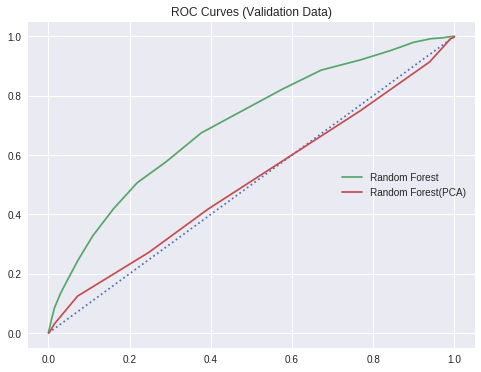

In [143]:
figure(figsize=(8, 6))
plot(
    [0, 1], [0, 1],
    linestyle='dotted')
plot(
    1 - rf_oos_performance.specificity,
    rf_oos_performance.recall,
    label='Random Forest')
plot(
    1 - rf_oos_performance_pca.specificity,
    rf_oos_performance_pca.recall,
    label='Random Forest(PCA)')
title('ROC Curves (Validation Data)')
legend(loc='right')

In [94]:
recall_threshold = .2
idx = next(i for i in range(100) if rf_oos_performance.recall[i] <= recall_threshold) - 1
selected_prob_threshold = prob_thresholds[idx]
selected_prob_threshold

0.14174729459034488

In [95]:
rf_test_pred_probs = rf_model.predict_proba(X=get_dummies(X_test))

rf_test_oos_performance = bin_classif_eval(
    rf_test_pred_probs[:, 1], churn_test == 'yes',
    pos_cat='yes', thresholds=selected_prob_threshold)

rf_test_oos_performance

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1024 out of 1024 | elapsed:    0.9s finished


{'accuracy': 0.8808,
 'deviance': 0.48157829157108656,
 'f1_score': 0.24747474747474746,
 'precision': 0.23058823529411765,
 'recall': 0.2670299727520436,
 'specificity': 0.9294193826894022}

## Get the best F1 score

In [125]:
rf_oos_performance.loc[rf_oos_performance['f1_score'].idxmax]

threshold      0.107227
accuracy       0.808778
recall         0.419062
specificity    0.839669
precision      0.171623
f1_score       0.243516
deviance       0.487537
Name: 83, dtype: float64

## calcute the AUC score
To call roc_auc_score in GG colab, we need change yes/no to 1/0, otherwise we'll get following error:<br>
> ValueError: Data is not binary and pos_label is not specified

In [0]:
newchurn_test = churn_test.copy()

In [0]:
newchurn_test = newchurn_test.replace('yes', 1)

In [0]:
newchurn_test = newchurn_test.replace('no', 0)

In [131]:
# calculate AUC based on ROC
from sklearn import metrics
#auc = metrics.roc_auc_score(X_valid_combile['churn'].values, rf_pred_probs[:,1])
#rf_auc = metrics.roc_auc_score(churn_test, rf_test_pred_probs[:,1])
rf_auc = metrics.roc_auc_score(newchurn_test, rf_test_pred_probs[:,1])

print ("AUC score of RF (Test): %f" %rf_auc)

AUC score of RF (Test): 0.719650


# GG drive connection
The following two cells are for connect GG drive only<br>
no need to execute if we don't mount GG drive

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p /content/drive
!google-drive-ocamlfuse /content/drive

# Bakcup the RF model in GG drive

In [0]:
!cp /content/KDD2009/rf_model.joblib /content/drive/DNN/KDD2009

In [82]:
!md5sum /content/drive/DNN/KDD2009/rf_model.joblib

244de08787348488fc1823b994ffffe7  /content/drive/DNN/KDD2009/rf_model.joblib


In [83]:
!md5sum /content/KDD2009/rf_model.joblib

244de08787348488fc1823b994ffffe7  /content/KDD2009/rf_model.joblib


# Load the saved model

In [0]:
from sklearn.externals import joblib
rf_model_load = joblib.load('rf_model.joblib')

In [123]:
rf_pred_probs = rf_model_load.predict_proba(X=get_dummies(X_valid))
rf_oos_performance = bin_classif_eval(
    rf_pred_probs[:, 1], churn_valid == 'yes',
    pos_cat='yes', thresholds=prob_thresholds)
rf_oos_performance

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 1024 out of 1024 | elapsed:    1.8s finished
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars


,threshold,accuracy,recall,specificity,precision,f1_score,deviance
0,0.000001,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
1,0.000001,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
2,0.000001,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
3,0.000002,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
4,0.000002,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
5,0.000002,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
6,0.000002,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
7,0.000003,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
8,0.000003,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
9,0.000004,0.073444,1.000000,0.000000,0.073444,0.136839,0.487537
